# TP1

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
 (énergie rayonnante d’un corps noir). L’énergie rayonnante d’un corps noir dans l’intervalle
d’émission $[λ, λ + dλ]$, par unité de surface et de temps, est appelée émittance monochromatique
maximale du corps noir et est notée $M(λ)$. Sa valeur, exprimée en $\frac{Wb}{m^2}$, est donnée par la loi
de Planck :
$$
M(λ) = \frac{2πhC^{2}_0}{n^2 λ^5}  \frac{1}{exp(\frac{hC_0}{nkTλ})-1}
$$
Les constantes intervenant dans cette loi sont

• $C_0$ ≈ 2.997 × 108m/s : vitesse de la lumière dans le vide.

• $h$ ≈ 6.625 × 10−34J.s : constante de Planck.

• $k$ ≈ 1.380 × 10−23J/K : constante de Boltzmann.

• $λ$ : longueur d’onde (m).

• $T$ : température absolue de la surface du corps noir (K).

• $n = 1$ : indice de réfraction du milieu (ici le vide).

In [2]:
#On definit la fonction 
def M_func(lmbd,T):
    C0 = 2.997e8
    h = 6.625e-34
    k = 1.380e-23
    #n = 1
    temp1 = (2*np.pi*h*C0**2)/(lmbd**5)
    temp2 = h*C0/(k*T*lmbd)
    return temp1/(np.exp(temp2)-1)

In [3]:
T_arr = np.linspace(300,800,11)
lmbd_arr = np.linspace(10e-7, 2e-5,100) 

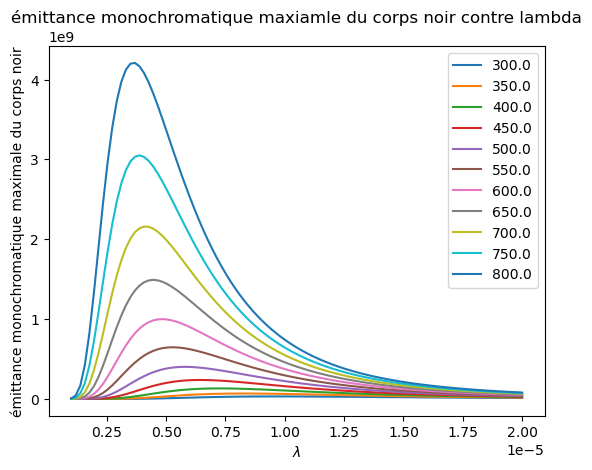

In [4]:
for i in range (0,11):
    res_arr = M_func(lmbd_arr,T_arr[i]) 
    plt.plot(lmbd_arr,res_arr,label = (T_arr[i]))

plt.xlabel(r'$\lambda$')
plt.ylabel('émittance monochromatique maximale du corps noir')
plt.title('émittance monochromatique maxiamle du corps noir contre lambda')
plt.legend()


Au dessous, on montre l'émittance monochromatique maximale du corps noir pour plusiers valeurs de la temperature absolue de la surface du corps noir (T). On regarde que les températures plus élevées ont des maxima plus élevés qui correspondent aux valeurs plus petits de lambda.

On souhaite trouver la valeur λ* de λ qui maximise l’émittance monochromatique pour une température de surface T donnée. 
Pour utiliser la méthode de la section dorée, il faut que la fonction soit unimodale. 

heureusement, comme la fonction est continue et relativement régulière, ce comportement est visible sur le graphique. Don on peut continuer

In [5]:


def sec_dor(f, a, b, tol=1e-10):
    """La méthode de la section dorée
    
    donné une fonction f qui est unimodale dans
    l'intervalle [a,b], sec_dor retourne une minimiseur
    avec une precision de la tolerance (tol)
    
    """
     # on assure que [a,b] est une intervalle bien definie
    (a,b) = (min(a,b),max(a,b)) 
    
    
    #on définit p
    p = (np.sqrt(5) - 1)/2 # 1 / phi

   
    h = b - a
    if h <= tol: #on termine si l'intervalle ]a,b[ est déjà assez petit
        return (a + b) / 2 # on retourne la moyenne de l'intervalle qui contient la minimum

    # on détermine les valeurs initiales de f(c) et f(d)
    c = a + (1-p) * h
    d = a + p * h
    val_c = f(c)
    val_d = f(d)
    
    k = 0

    while h >= tol and k < 10000:           
        #on termine lorsque l'intervalle ]a,b[ est assez petit ou la nombre d'iterations devient trop grande.
        if val_c < val_d:  
            # yc > yd on met à jour les valeurs de b,c,d et h
            b = d
            d = c
            val_d = val_c # on réutilise la valeur de f(c) de l'itération précedente
            h = p * h  # caractéristique de la methode
            c = a + (1 - p) * h
            val_c = f(c) # on prend une seule evaluation de f
        else: 
            # yc < yd on met à jour les valeurs de a,c,d et h
            a = c
            c = d
            val_c = val_d 
            h = p * h 
            d = a + p * h
            val_d = f(d) # la seule evaluation de f
        k = k+1

    if val_c < val_d:
        return (a + d) / 2
    else:
        return (c + d) / 2

    
    


In [6]:
a = 10e-7
b = 2e-5

T = 550
G = lambda lmbd: - M_func(lmbd, T)

print(sec_dor(G, a, b))

5.2686629551842115e-06


cet algorithme renvoie le minimum, mais nous recherchons le maximum de notre fonction donc nous appliquons l'algorithme à $- f$.

In [7]:
min_arr = np.zeros(T_arr.shape)
i = 0

for T in T_arr: # on cherche la minimiseur pour chaque valeur de T
    G = lambda lmbd:  -M_func(lmbd, T)
    min_arr[i] =  sec_dor(G, a, b)
    print("le minimum pour T = ", T," est", min_arr[i])
    i += 1

le minimum pour T =  300.0  est 9.659242454139414e-06
le minimum pour T =  350.0  est 8.279334778401501e-06
le minimum pour T =  400.0  est 7.2444388334929785e-06
le minimum pour T =  450.0  est 6.439483313364191e-06
le minimum pour T =  500.0  est 5.795532747521257e-06
le minimum pour T =  550.0  est 5.2686629551842115e-06
le minimum pour T =  600.0  est 4.829618688966494e-06
le minimum pour T =  650.0  est 4.4581068118794616e-06
le minimum pour T =  700.0  est 4.139658167047651e-06
le minimum pour T =  750.0  est 3.863691262311953e-06
le minimum pour T =  800.0  est 3.6222035105435013e-06


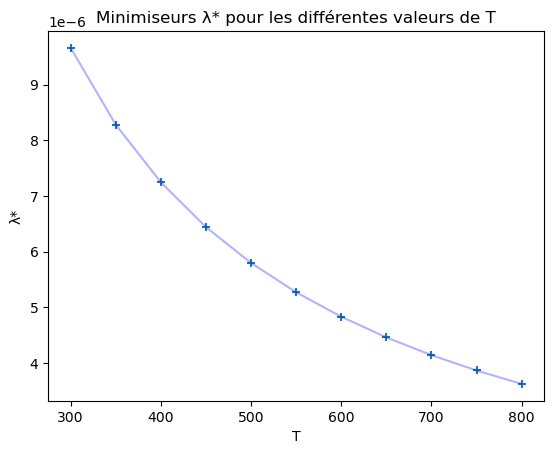

In [8]:
min_arr

fig, ax = plt.subplots()
ax.set_title("Minimiseurs λ* pour les différentes valeurs de T")
ax.set_xlabel("T")
ax.set_ylabel("λ*")

ax.scatter(T_arr,min_arr, marker = "+")
ax.plot(T_arr,min_arr,'b', alpha = 0.3)


Ce graphique montre une corrélation négative entre les valeurs de $T$ et la valeur de $\lambda *$

Maintenant, on souhaite vérifier les lois de Wien : $λT = A $ et
$M(λ) = BT^5$
, où A et B désignent des constantes.

A =  0.0028978
B =  1.2857e-05


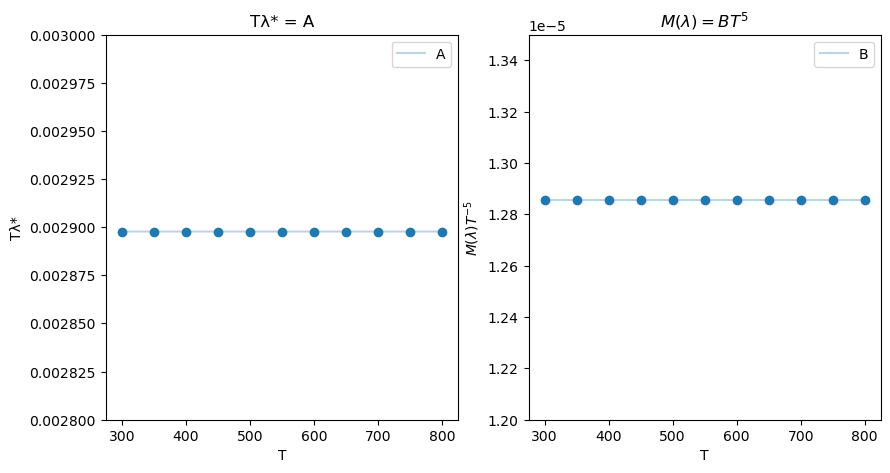

In [9]:
#on fait les graphiques
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].set_title("Tλ* = A")
ax[0].set_ylim(2.8e-3,3e-3)
ax[0].set_xlabel("T")
ax[0].set_ylabel("Tλ*")
ax[0].scatter(T_arr,T_arr*min_arr)
ax[0].plot(T_arr,T_arr*min_arr,alpha = 0.3,label = "A")

print("A = ", np.round(np.mean(T_arr*min_arr),7))

ax[1].set_title('$M(λ) = BT^5$')
ax[1].set_ylim(1.2e-5,1.35e-5)
ax[1].set_xlabel("T")
ax[1].set_ylabel("$M(λ)T^{-5}$")
ax[1].scatter(T_arr,(T_arr ** -5) * M_func(min_arr,T_arr))
ax[1].plot(T_arr,(T_arr ** -5) * M_func(min_arr,T_arr),alpha = 0.3, label = "B")

print("B = ", np.round(np.mean((T_arr ** -5) * M_func(min_arr,T_arr)),9))

ax[0].legend()
ax[1].legend()


Il est clair par les graphiques au dessus que les deux lois donne une vrai rélation pour tous les valeurs de $T$ qui était considerée. en plus, les constants $A$ et $B$ sont $0.002898$ et $1.286e-05$ respectivement.


## Exercise 2: méthodes de type gradient pour des fonctions quadratiques

On se trouve dans la configuration de la feuille de TP 1

In [10]:
from scipy.sparse import diags
import scipy.linalg

In [11]:
#définir fonctions mathématiques
def A(n):
    return diags([-2, 4, -2], [-1, 0, 1], shape=(n, n)).toarray()
    
def b(n):
    return np.ones(n)

def Jn(A,b,x):
    return np.dot(np.dot(A,x),x)/2 - np.dot(b,x)

def gradJn(A,b,x):
    return np.dot(A,x) - b # (At + A = 2 * A) comme A symétrique 

In [12]:
nx = 101
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,nx)
X, Y = np.meshgrid(x,y) 

Z = np.zeros((nx,nx))
for i in range(nx):
    for j in range(nx):
        Z[i,j] = Jn(A(2),b(2),np.array([X[i,j],Y[i,j]]))

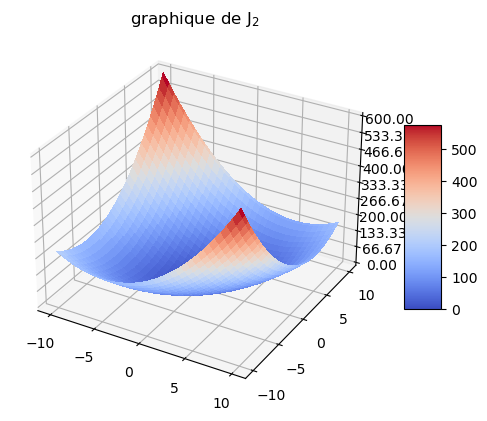

In [73]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        
# on trace la surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# z axis
ax.set_zlim(0,600)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# ajouter un colorbar
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("graphique de J$_2$")
plt.show()

ci-dessus est une carte de couleur 3d qui montre le comportement de $J2$. On note la convexité visible.

In [74]:
print('les valeurs propres de A9 sont: ', scipy.sparse.linalg.eigs(A(9))[0])
print('les valeurs propres de A10 sont: ', scipy.sparse.linalg.eigs(A(10))[0])
print('les valeurs propres de A20 sont: ', scipy.sparse.linalg.eigs(A(20))[0])

les valeurs propres de A9 sont:  [7.80422607+0.j 7.23606798+0.j 6.35114101+0.j 5.23606798+0.j
 4.        +0.j 2.76393202+0.j]
les valeurs propres de A10 sont:  [7.83797189+0.j 7.36501413+0.j 6.61944294+0.j 5.66166005+0.j
 4.56925935+0.j 3.43074065+0.j]
les valeurs propres de A20 sont:  [7.9553233 +0.j 7.82229122+0.j 7.60387547+0.j 7.3049551 +0.j
 6.93220749+0.j 6.49395921+0.j]


toutes les valeurs propres de $A_9$, $A_{10}$, $A_{20}$ sont réel et positive. Alors comme $A_n$ est symmetrique pour tout entier positif n, $A_9$, $A_{10}$, $A_{20}$ sont definie postive.

### Methode de gradient à pas constant

In [16]:
def methpc(J,gradJ,s,x0):
    
    eps = 1e-5
    #étape initiale
    #xk est choisi ici tels que
    #les criteres d'arrete ne sont pas
    #satisfait d'abord
    xk =  x0*10
    xkplus = x0
    xk_arr = [x0]
    #critere d'arrete
    while ((np.linalg.norm(xkplus-xk)/(1 + np.linalg.norm(xk)) > eps) and ((np.linalg.norm(J(xkplus)-J(xk))/(1 + np.linalg.norm(J(xk)))) > eps)):
        xk = xkplus        
        dk = -gradJ(xk) #direction de descente
        #trouver xk+1
        xkplus = xk + s*dk
        #ajouter xk dans la liste
        xk_arr.append(xkplus)
    return xkplus, np.array(xk_arr), len(xk_arr)-1

Il est important de choisir le pas fixe, ni trop grand, ni trop petit
Pour un pas trop grande il n'y aura pas de convergence.
pour un pas trop petit, il peut etre un convergence qui est mal detecté et en plus la reduction dans le pas donne un augmentation dans la coute du compuation

### Methode pas optimale

In [17]:
def pas_optimale(J,xk,dk):
    #on choisit l'intervalle de recherche
    #dans la direction du pas dk
    a = 0
    #10 est choisit comme borne superieure
    #par inspection du graphique de J
    b = 10
    #on  définit un nouveau fonction qui
    #s: -> xk + s*dk qu'on veut minimiser par la
    #methode de la section dorrée
    return sec_dor(lambda s: J(xk + s*dk), a, b, tol=1e-5)



def methpo(J,gradJ,x0):  
    
    '''   
    Methode à pas optimale, qui utilise la methode de la section dorée
    pour trouver le pas optimale en chaque étape
    
    Retourne:
    xkplus: minimiseur trouvé
    xk_arr: liste des étapes
    len(xk_arr)-1: nombre des étapes
    '''
    eps = 1e-5
    #étape initiale
    #xk est choisi ici tels que
    #les criteres d'arrete ne sont pas
    #satisfait d'abord
    xk = x0*10
    xkplus = x0
    xk_arr = [x0]
    #critere d'arrete
    while ((np.linalg.norm(xkplus-xk)/(1 + np.linalg.norm(xk)) > eps)
           and ((np.linalg.norm(J(xkplus)-J(xk))/
                 (1 + np.linalg.norm(J(xk)))) > eps)):
        xk = xkplus        
        dk = -gradJ(xk) #direction de descente
        #trouver xk+1
        sk = pas_optimale(J,xk,dk)
        xkplus = xk + sk*dk
        xk_arr.append(xkplus)
    return xkplus, np.array(xk_arr), len(xk_arr)-1


Application des methodes

In [18]:
J2=lambda x:Jn(A(2),b(2),x) 
gradJ2=lambda x:gradJn(A(2),b(2),x) 

In [19]:
#créer un "meshgrid" de valeurs de J
#stocker dans X,Y,Z
nx = 101
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,nx)
X, Y = np.meshgrid(x,y) 

#Valeurs de J
ZJ = np.zeros((nx,nx))
for i in range(nx):
    for j in range(nx):
        ZJ[i,j] = Jn(A(2),b(2),np.array([X[i,j],Y[i,j]]))
        


In [20]:
#Valeurs de GradJ - champ vecteur

#on reduit la nombre d'evaluations pour
#le champ vecteur
nx2 = 10
x2 = np.linspace(-10,10,nx2)
y2 = np.linspace(-10,10,nx2)
X2, Y2 = np.meshgrid(x2,y2) 

U = np.zeros((nx2,nx2))
V = np.zeros((nx2,nx2))
for i in range(nx2):
    for j in range(nx2):
        U[i,j], V[i,j] = gradJn(A(2),b(2),np.array([X2[i,j],Y2[i,j]]))




In [21]:
#Methode au pas constante
s = 0.01
x0 = np.array([2,8])
sol_pc, pas_const, pas_const_len = methpc(J2,gradJ2,s,x0)

In [22]:
#methode au pas optimale:

x0 = np.array([2,8])
sol_po, pas_opt, pas_opt_len = methpo(J2,gradJ2,x0)

In [75]:
print('la solution de la méthode a pas optimale est ', sol_po,', la solution a pas constante est', sol_pc,', la methode a pas optimale utilise ', pas_opt_len, 'étapes ')

la solution de la méthode a pas optimale est  [1.0241028  1.05006309] , la solution a pas constante est [2.91429234 8.51938597] , la methode a pas optimale utilise  380 étapes 


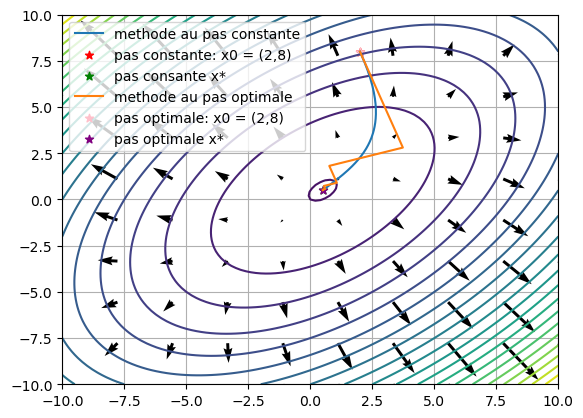

In [24]:
fig, ax = plt.subplots()
ax.set_ylim([-10,10])
ax.set_xlim([-10,10])
#tracer 
#1)courbes de niveau pour J
ax.contour(X, Y, ZJ, 20)
#2)champ vecteur de gradJ
ax.quiver(X2, Y2, U, V)



#3a)points pour pas constante
ax.plot(pas_const[:,0],pas_const[:,1],
        label = 'methode au pas constante')
#3b)point initiale pour pas constante
ax.scatter(pas_const[0,0],pas_const[0,1],
           label = "pas constante: x0 = (2,8)",
           c="r", marker = "*")
#3c) point finale pour pas constante
ax.scatter(pas_const[-1,0],pas_const[-1,1],
           label = "pas consante x*", c="g", 
           marker = "*")

#4a)points pour pas optimale
ax.plot(pas_opt[:,0],pas_opt[:,1],
        label = 'methode au pas optimale')
#3b)point initiale pour pas optimale
ax.scatter(pas_opt[0,0],pas_opt[0,1],
           label = "pas optimale: x0 = (2,8)",
           c="pink", marker = "*")
#3c) point finale pour pas optimale
ax.scatter(pas_opt[-1,0],pas_opt[-1,1],
           label = "pas optimale x*", c="purple", 
           marker = "*")

ax.grid(True)

ax.legend()



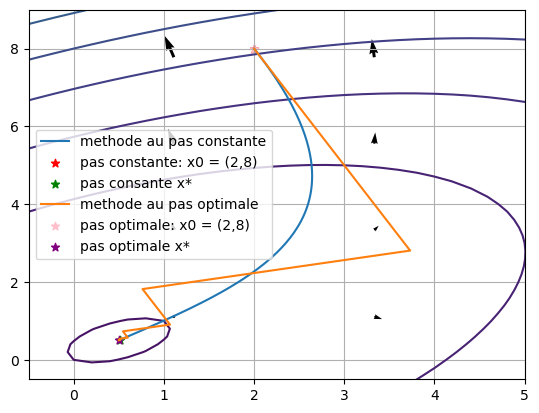

In [25]:
fig, ax = plt.subplots()
ax.set_ylim([-0.5,9])
ax.set_xlim([-0.5,5])
#tracer 
#1)courbes de niveau pour J
ax.contour(X, Y, ZJ, 20)
#2)champ vecteur de gradJ
ax.quiver(X2, Y2, U, V)



#3a)points pour pas constante
ax.plot(pas_const[:,0],pas_const[:,1],
        label = 'methode au pas constante')
#3b)point initiale pour pas constante
ax.scatter(pas_const[0,0],pas_const[0,1],
           label = "pas constante: x0 = (2,8)",
           c="r", marker = "*")
#3c) point finale pour pas constante
ax.scatter(pas_const[-1,0],pas_const[-1,1],
           label = "pas consante x*", c="g", 
           marker = "*")

#4a)points pour pas optimale
ax.plot(pas_opt[:,0],pas_opt[:,1], 
        label = 'methode au pas optimale')
#3b)point initiale pour pas optimale
ax.scatter(pas_opt[0,0],pas_opt[0,1],
           label = "pas optimale: x0 = (2,8)",
           c="pink", marker = "*")
#3c) point finale pour pas optimale
ax.scatter(pas_opt[-1,0],pas_opt[-1,1],
           label = "pas optimale x*", c="purple", 
           marker = "*")

ax.grid(True)

ax.legend()

Les deux graphiques montrent le comportement des algorithmes dans la région pour trouver le minimum de J. La méthode à pas constant suit une courbe et la méthode à pas optimal est affine par morceaux. Dans ce cas, la méthode des étapes optimales prend dix étapes. Chaque méthode trouve le même emplacement de minima avec un niveau de différence qui peut être pris en compte dans l'incertitude associée à nos critères d'arrêt. Les méthodes ont donc du succès. On note que la solution est $(0.5,0.5)$

# Rapidité de convergence pour valeurs différentes de n

Pour comparer la vitesse de convergence des deux méthodes, on utilise le module Python 'timeit' qui mesure le temps d'exécution de chaque méthode. Nous évaluerons l'efficacité de chaque méthode pour $n = 10,20,30$. parce que je travaille actuellement sur du matériel limité, j'ai dû restreindre les valeurs de n, mais cela peut facilement être modifié en ajoutant 50 et 100 au tableau n comme vous le souhaitez.

In [26]:
import time

In [27]:
#x0 = [5,5,5,5,...]
n = 10
x0 = np.ones(n)*5
s = 0.01
sol_po, pas_opt, pas_opt_len = methpc(
    lambda x:Jn(A(n),b(n),x),
    lambda x:gradJn(A(n),b(n),x), 
    s, x0)

In [28]:
n_arr  = [10, 20, 30]
time_arr_po = []
time_arr_pc = []

#pas = 0.01
s = 0.01

for n in n_arr:
    
    x0 = np.ones(n)*5
    
    #mesure pas constante temps
    #meeasure le temps de commence
    start_time = time.time()

    # Call methpc
    sol_pc, pas_const, pas_const_len = methpc(
    lambda x:Jn(A(n),b(n),x),
    lambda x:gradJn(A(n),b(n),x), 
    s, x0)
    # Measure le temps de fin
    end_time = time.time()

    # Calculer le temps d'éxecution
    execution_time = end_time - start_time
    
    time_arr_pc.append(execution_time)
    print(execution_time, 'pc')
        
    #mesure pas optimale temps
    #mesure le temps de commence
    start_time = time.time()
    
    sol_po, pas_opt, pas_opt_len = methpo(
    lambda x:Jn(A(n),b(n),x),
    lambda x:gradJn(A(n),b(n),x), 
    x0)
    # Measure le temps de fin
    end_time = time.time()

    # Calculer le temps d'éxécution
    execution_time = end_time - start_time
    
    time_arr_po.append(execution_time)
    print(execution_time, 'po')
        
    
    
print(time_arr_po)
print(time_arr_pc)


3.227155923843384 pc
2.524548053741455 po
21.42771816253662 pc
12.394890785217285 po
39.39845585823059 pc
24.74178457260132 po
[2.524548053741455, 12.394890785217285, 24.74178457260132]
[3.227155923843384, 21.42771816253662, 39.39845585823059]


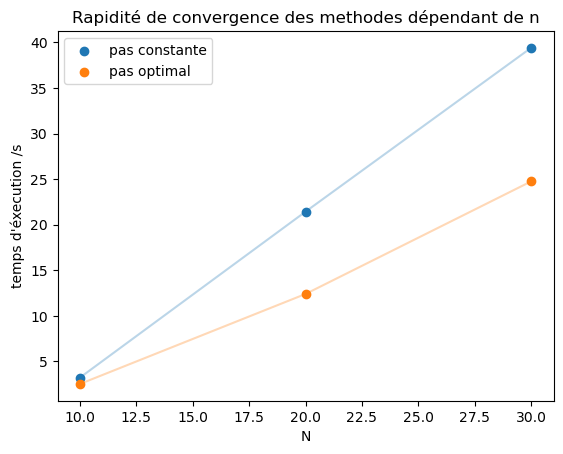

In [29]:
fig, ax = plt.subplots()

ax.scatter(n_arr, time_arr_pc, label = 'pas constante')
ax.scatter(n_arr, time_arr_po, label = 'pas optimal')
ax.plot(n_arr, time_arr_pc, alpha = 0.3)
ax.plot(n_arr, time_arr_po, alpha = 0.3)
ax.set_ylabel('temps d\'éxecution /s')
ax.set_xlabel('N')
ax.set_title('Rapidité de convergence des methodes dépendant de n')
plt.legend()

On regarde que la méthode au pas optimale converge plus rapidement pour chaque valuer de N. 

Pour la methode au pas constante, l'augmentation semble être linéaire, cela s'explique par le rapport entre la longueur du pas (qui reste constante pour tout N) et la distance entre x0 et le minimum qui augmente linéairement avec la dimension N.

Ce comportement apparaît pour notre choix actuel de x0, de longueur de pas et de tolérances dans les algorithmes respectifs. Donc, une enquête plus approfondie devrait être faite sur le problème pour tirer des conclusions absolues

## Exercise 3

On considère maintenant la Fonction de Rosenbrock: $$f(x, y) = (x - 1)^2 + 10(x^2 - y)^2$$

Trouver les points critiques de la fonction
il faut trouver les valeurs de $x$ et $y$ où les dérivées partielles par rapport à $x$ et $y$ s'annulent.

1. Calculer les derivées partielles de f par rapport à x et y:

   $∂f/∂x = 2(x - 1) + 40x(x^2 - y)$
   
   $∂f/∂y = -20(x^2 - y)$

2. trouver x et y tel que les derivées partielles s'annullent:

   $∂f/∂y = 0$: 
   
   $-20(x^2 - y) = 0$
   
   en simplifiant:
   
   $x^2 - y = 0$
   
   ceci donne $y = x^2$.

   on pose $y = x^2$ dans $∂f/∂x = 0$:

   $2(x - 1) + 40x(x^2 - x^2) = 0$
   
   $2(x - 1) = 0$
   
   enfin $x = 1$.

3. comme $x = 1$ et $y = x^2$:

   $y = 1^2$
   
   qui donne $y = 1$.

alors, le seul point critique de $f(x, y) = (x - 1)^2 + 10(x^2 - y)^2$ en $R^2$ est $(1, 1)$. 

ce point critique est soit un maximum global, soit un minimum global.

comme $f(0,0) = 1$ et $f(1,1) = 0$ donc $f(0,0) > f(1,1)$.

alors $(1,1)$ est forcement un minimum global

$$∇^2f(x, y) = \begin{bmatrix} \frac{∂^2f}{∂x^2} & \frac{∂^2f}{∂x∂y}  \\ \frac{∂^2f}{∂x∂y} & \frac{∂^2f}{∂y^2} \end{bmatrix}$$

$\frac{∂^2f}{∂x^2} = 2 + 120x - 40y$

$\frac{∂^2f}{∂y^2} = -20$

$\frac{∂^2f}{∂x∂y} = -40x$

Ainsi:

$$∇^2f(1, 1) = \begin{bmatrix} 82 & -40 \\ -40 & -20 \end{bmatrix}$$

In [30]:
jacpc = np.array([[82,-40],[-40,-20]])
print("le conditionnement de la matrice est ",np.linalg.cond(jacpc))

le conditionnement de la matrice est  2.833499242261883


le conditionnement de la matrice est faible et le matrice est donc bien conditionné. Cela signifie que le probleme est stable par les petit pertubations et donc adapté pour les méthodes d'approximation en générale.

In [31]:
def f(x):
    return (x[0] - 1)**2 + 10 * (x[0]**2 - x[1])**2

def gradf(x):
    return np.array(
        [2 * (x[0] - 1) + 40 * x[0] * (x[0]**2 - x[1])
         , -20*(x[0]**2 - x[1]) ])
    

In [44]:
#Methode au pas constante
s = 1e-4
x0 = np.array([9,8])
sol_pc, pas_const, pas_const_len = methpc(f,gradf,s,x0)

### Représentation Graphique:

In [45]:
#methode au pas optimale:

x0 = np.array([9,8])
sol_po, pas_opt, pas_opt_len = methpo(f,gradf,x0)

In [47]:
#créer un "meshgrid" de valeurs de J
#stocker dans X,Y,Z
nx = 101
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,nx)
X, Y = np.meshgrid(x,y) 

#Valeurs de J
ZJ = np.zeros((nx,nx))
for i in range(nx):
    for j in range(nx):
        ZJ[i,j] = f(np.array([X[i,j],Y[i,j]]))

In [48]:
#Valeurs de GradJ - champ vecteur

#on reduit la nombre d'evaluations pour
#le champ vecteur
nx2 = 10
x2 = np.linspace(-10,10,nx2)
y2 = np.linspace(-10,10,nx2)
X2, Y2 = np.meshgrid(x2,y2) 

U = np.zeros((nx2,nx2))
V = np.zeros((nx2,nx2))
for i in range(nx2):
    for j in range(nx2):
        U[i,j], V[i,j] = gradf(np.array([X2[i,j],Y2[i,j]]))




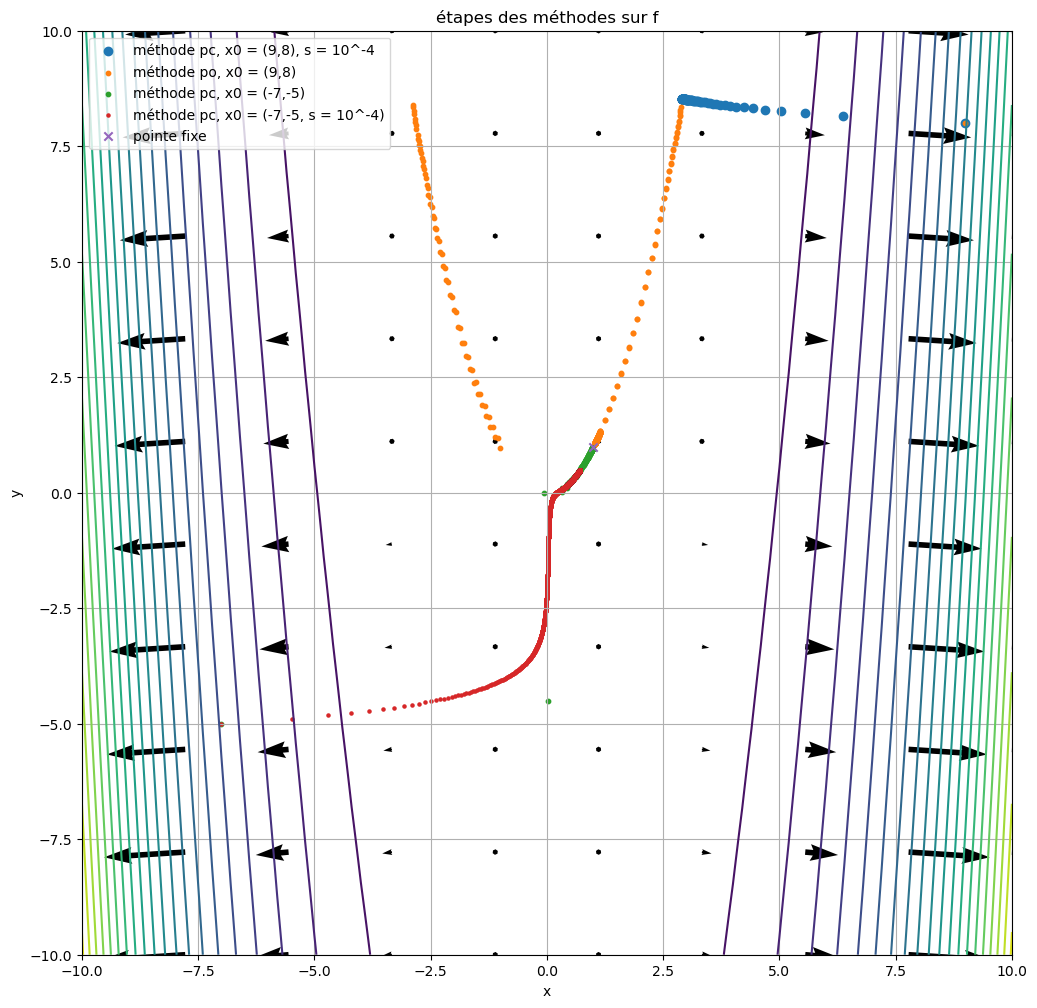

In [71]:
fig, ax = plt.subplots(figsize = (12,12))

ax.set_ylim([-10,10])
ax.set_xlim([-10,10])
ax.set_title('étapes des méthodes sur f')
ax.set_xlabel('x')
ax.set_ylabel('y')
#tracer 
#1)courbes de niveau pour J
ax.contour(X, Y, ZJ, 20)
#2)champ vecteur de gradJ
ax.quiver(X2, Y2, U, V)

ax.scatter(pas_const[:,0],pas_const[:,1], label = 'méthode pc, x0 = (9,8), s = 10^-4')
ax.scatter(pas_opt[:,0],pas_opt[:,1], label = 'méthode po, x0 = (9,8)', s = 10 )



#Methode au pas constante




sol_po2, pas_opt2, pas_opt_len2 = methpo(f,gradf,x0 =np.array([-7,-5]))
sol_const2, pas_const2, pas_const_len2 = methpc(f,gradf,x0 =np.array([-7,-5]), s= 1e-4)


ax.scatter(pas_opt2[:,0],pas_opt2[:,1], label = 'méthode pc, x0 = (-7,-5)', s = 10)
ax.scatter(pas_const2[:,0],pas_const2[:,1], label = 'méthode pc, x0 = (-7,-5, s = 10^-4)', s = 5)



ax.scatter([1],[1], marker = 'x',label = 'pointe fixe')

ax.legend()
ax.grid()



Dans notre exemple, le comportement de la méthode à pas constant n'est pas ce que nous voulons. Il n'arrive pas toujours à trouver le minimum souhaité. En génerale, les valeurs initiales $x0$ qui ont un valeur de $y \le 0$ convergent, et les autres ne convergent pas. Pour $x_0 = (9,8)$, la méthode termine vers $(2,8)$ qui se situe dans un valée dans le sous variété. la méthode ne se rend pas compte que ce n'est pas un minimum exact.

Pour $x_0 = (-7,-5)$, la méthode termine vers $(2,8)$, le vrai minimum.

En revanche, la méthode à pas optimale converge vers ce minimum souhaité.

Dans notre premier cas : $x_0 = (9,8)$ la manière dont il converge est notamment intéressante. Plutôt que de suivre un chemin direct vers le minimum, il semble se déplacer périodiquement entre deux vallées dans la variété $x,y,f(x)$, sautant en arrière et à travers. En effet, alors que le gradient pointe (très légèrement) vers la droite et la gauche (dans les directions x), le minimum est en fait en dessous (à une valeur y inférieure) donc les étapes de l'algorithme doivent descendre dans ce tour sur le chemin.

Lorsque l'algorithme vient d'en bas, (lorsque $x_0 = (-7,-5)$), nous voyons un comportement plus intéressant, les étapes vont du bas à gauche, au bas cente, puis directement vers le haut, jusqu'à atteindre le côté droit vallée d'avant et après au minimum.

Le gradient dans ces vallées est très faible, ce qui signifie qu'il est plus difficile que d'habitude pour les algorithmes de choisir la bonne étape suivante, et il nous est également difficile d'utiliser des conditions d'arrêt normales.

Notre méthode a convergé en 380 étapes, ce qui est beaucoup plus élevé que le nombre des problèmes précédents. Il s'agit très probablement d'une caractéristique de complexité de la fonction de rosenbrock, qui a été délibérément conçue pour tester des algorithmes d'optimisation.